In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().values.any()

False

In [10]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [11]:
df = df.replace('?', np.NaN)

In [12]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [14]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [15]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

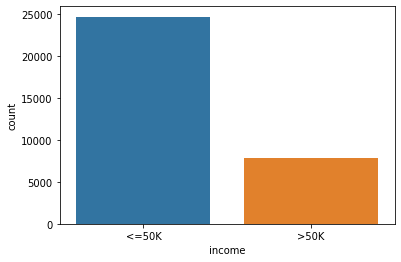

In [16]:
sns.countplot(x='income', data = df)

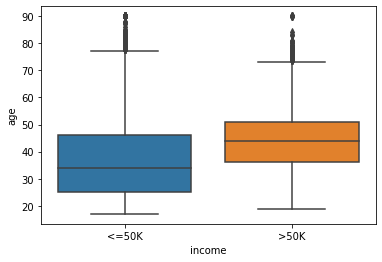

In [17]:
sns.boxplot(y='age',x='income',data=df)

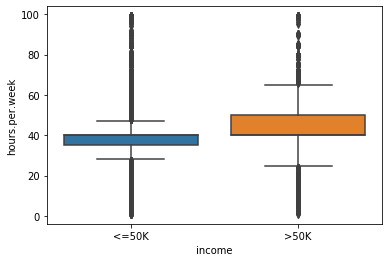

In [18]:
sns.boxplot(y='hours.per.week',x='income',data=df)

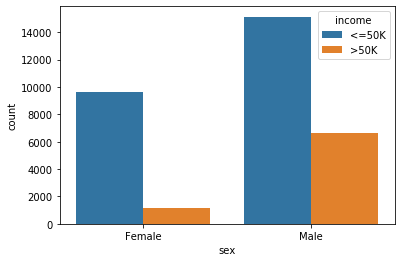

In [19]:
sns.countplot(df['sex'],hue=df['income'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

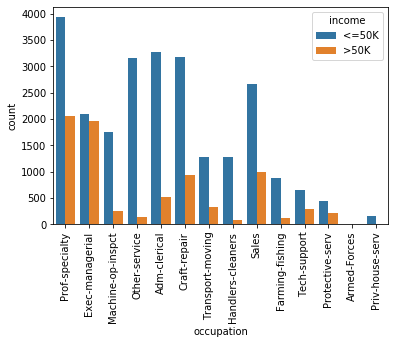

In [20]:
sns.countplot(df['occupation'],hue=df['income'])
plt.xticks(rotation=90)

In [21]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

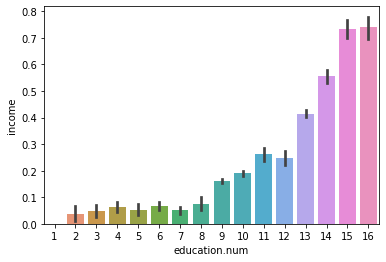

In [22]:
sns.barplot(x="education.num",y="income",data=df)

In [23]:
df['workclass'].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

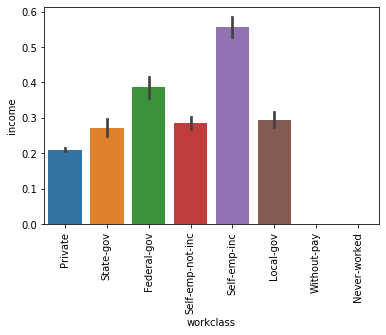

In [24]:
sns.barplot(x="workclass",y="income",data=df)
plt.xticks(rotation=90)

In [25]:
df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

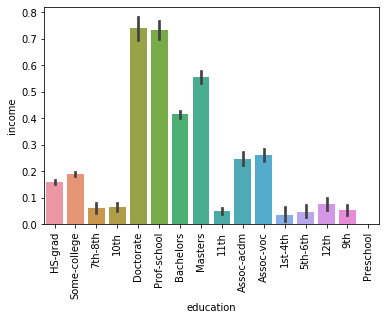

In [26]:
sns.barplot(x="education",y="income",data=df)
plt.xticks(rotation=90)

In [27]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

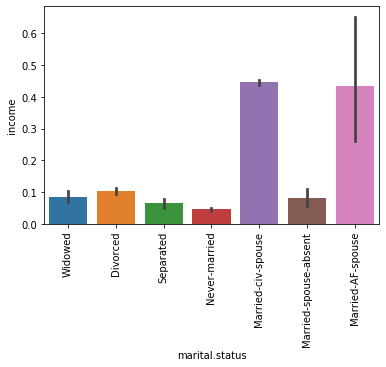

In [28]:
sns.barplot(x="marital.status",y="income",data=df)
plt.xticks(rotation=90)


In [29]:
df['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

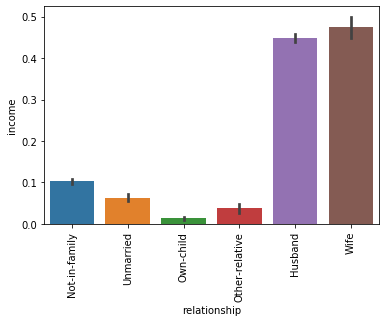

In [30]:
sns.barplot(x="relationship",y="income",data=df)
plt.xticks(rotation=90)

In [31]:
df['native.country'].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

In [34]:
df.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education.num     int64
marital.status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country    int32
income            int64
dtype: object

In [36]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,3,310152,15,10,4,10,1,4,1,0,0,40,38,0
32557,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32558,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32559,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32560,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


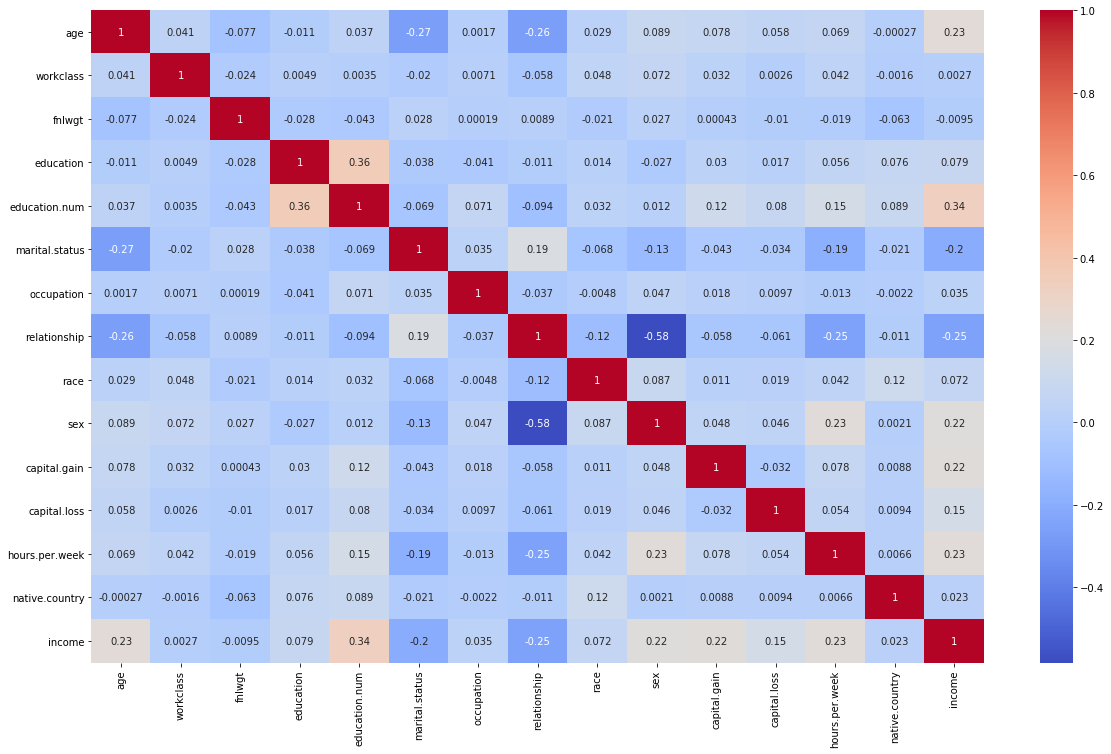

In [37]:
corrmat = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

In [38]:
corrmat['income'].sort_values(ascending = False)

income            1.000000
education.num     0.335154
age               0.234037
hours.per.week    0.229689
capital.gain      0.223329
sex               0.215980
capital.loss      0.150526
education         0.079317
race              0.071846
occupation        0.034625
native.country    0.023058
workclass         0.002693
fnlwgt           -0.009463
marital.status   -0.199307
relationship     -0.250918
Name: income, dtype: float64

In [39]:
# income column droup
X = df.iloc[:,0:-1]
# incoume column
y = df.iloc[:,-1]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

In [49]:
l=[]

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression:', acc * 100)
l.append(acc)

Logistic Regression: 82.59801412631795


In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('SVM:', acc * 100)
l.append(acc)

SVM: 84.96263691268298


In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Knn:',acc * 100)
l.append(acc)

Knn: 82.86416214556249


In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Decision Tree:', acc * 100)
l.append(acc)

Decision Tree: 81.82004299314157


In [54]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Naive Bayes:', acc * 100)
l.append(acc)

Naive Bayes: 80.52001228375474


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Random Forest:',acc * 100)
l.append(acc)
print(cm(y_test, y_pred))
print(cr(y_test, y_pred))

Random Forest: 85.62800696079435
[[6941  488]
 [ 916 1424]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7429
           1       0.74      0.61      0.67      2340

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



,0
Logistic Regression,0.825980
Support Vector Classifier,0.849626
K-Neighbors Classifier,0.828642
Decision Tree Classifier,0.818200
Gaussian Naive Bayes,0.805200
Random Forest Classifier,0.856280


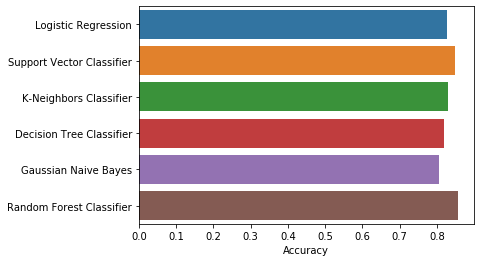

In [56]:
y_axis=['Logistic Regression',
     'Support Vector Classifier',
        'K-Neighbors Classifier',
      'Decision Tree Classifier',
       'Gaussian Naive Bayes',
      'Random Forest Classifier']
x_axis=l
sns.barplot(x=x_axis,y=y_axis)
plt.xlabel('Accuracy')
tabular_form = pd.DataFrame(x_axis,y_axis)
tabular_form.head(6)